# __Regularización__

La regularización es una técnica que nos permite evitar el sobreajuste en nuestre modelo. En este notebook se presetan los métodos de regularización L1 y L2 para los modelos de regresión.

## __Overfitting y Underfitting__

Antes de ver las técnicas de regularización veamos un caso en cual se presenta un caso de overfitting y underfitting para un modelo de regresión.

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

Supongamos que la relación real del conjunto de datos está determinada por $f(x) = cos(\frac{3\pi}{2}x)$ y el valor de $\epsilon$ sigue una distribución normal con $\mu=0$ y $\sigma^2=0.2$. Al generar una mucon valores normales de tamaño $30$ se obtienen los siguientes valores:

Text(0.5, 1.0, 'Regularization Example')

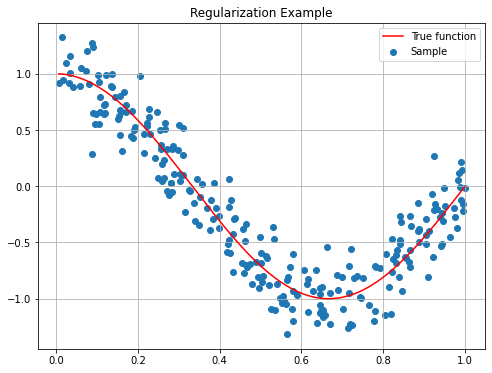

In [ ]:
f = lambda x :  np.cos(1.5 * np.pi * x)
sample_size = 250
X =np.sort(np.random.rand(sample_size))

Y = np.array([f(x) + np.random.normal(0,0.2) for x in X])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Sample')
plt.plot(X, [f(i) for i in X ], color='r', label='True function')
plt.legend()
plt.grid()
plt.title('Regularization Example')

Al generar tres modelos de regresión diferentes para polinomios de grado $1$, $3$ y $21$ se obtenien los siguientes modelos:

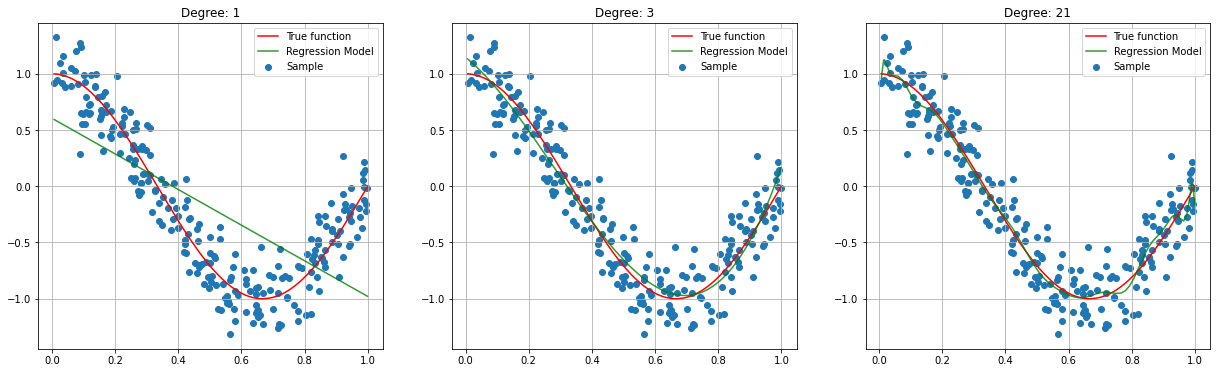

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

plt.figure(figsize=(21, 6))

pr = LinearRegression()
grados = [1, 3, 21]
y_pred = []
i = 1

for grado in grados:
  polinomio = PolynomialFeatures(degree=grado, include_bias=False)
  X_pol = polinomio.fit_transform(X)
  pr.fit(X_pol, Y)
  y_pred = pr.predict(X_pol)
  plt.subplot(1, 3, i)
  plt.scatter(X, Y, label='Sample')
  plt.plot(X, [f(i) for i in X ], color='r', label='True function')
  plt.plot(X, y_pred, color='green', alpha= 0.8, label='Regression Model')
  plt.legend()
  plt.grid()
  i +=1
  plt.title(f'Degree: {grado}')

(250, 1) (250, 3)


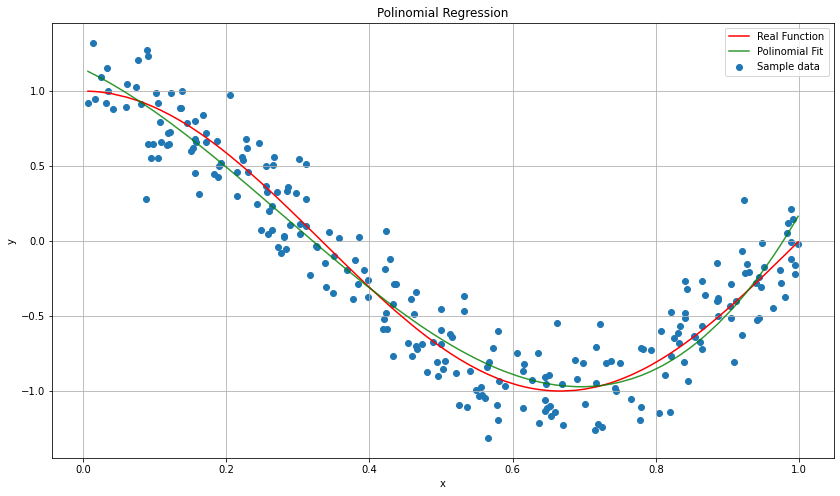

In [ ]:
pr = LinearRegression()

polinomio = PolynomialFeatures(degree=3, include_bias=False)
x = X.reshape(-1,1)
X_pol = polinomio.fit_transform(x)
print(x.shape, X_pol.shape)
pr.fit(X_pol, Y)
y_pol_pred = pr.predict(X_pol)

plt.figure(figsize=(14, 8))
plt.scatter(X, Y, label='Sample data')
plt.plot(X, f(X), color='red', label='Real Function')
plt.plot(X, y_pol_pred, color='green', alpha= 0.8, label='Polinomial Fit')
plt.title('Polinomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

## __Regularización para regresión lineal__

In [ ]:
f = lambda x :  np.cos(1.5 * np.pi * x)
sample_size = 30
X =np.sort(np.random.rand(sample_size))
Y = np.array([f(x) + np.random.normal(0,0.2) for x in X])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

### __Regressión de Ridge (Regularización L2)__

La regresión de Ridge utiliza la técnica de regularización L2 la cual penaliza el error del modelo mediante la suma del cuadrado del los coeficientes. Veamos un ejemplo:

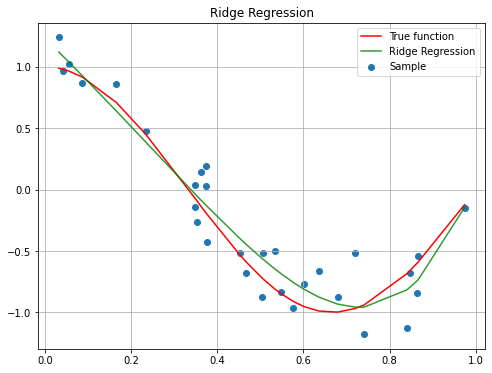

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)

polinomio = PolynomialFeatures(degree=21, include_bias=False)
X_pol = polinomio.fit_transform(X)

plt.figure(figsize=(8, 6))
ridge.fit(X_pol, Y)
ridge_pred = ridge.predict(X_pol)
plt.scatter(X, Y, label='Sample')
plt.plot(X, [f(i) for i in X ], color='r', label='True function')
plt.plot(X, ridge_pred, color='green', alpha= 0.8, label='Ridge Regression')
plt.legend()
plt.grid()
plt.title('Ridge Regression')
plt.show()

### __Regressión de Lasso (Regularización L1)__

La regresión de Lasso utiliza la técnica de regularización L1 la cual penaliza el error del modelo mediante la suma de los valores absolutos de los coeficientes. Veamos un ejemplo:

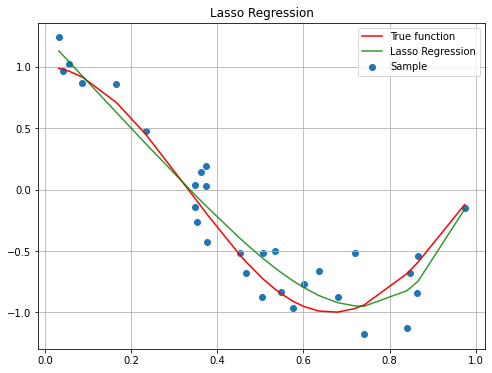

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001, max_iter= 1500)

plt.figure(figsize=(8, 6))

lasso.fit(X_pol, Y)

lasso_pred = lasso.predict(X_pol)
plt.scatter(X, Y, label='Sample')
plt.plot(X, [f(i) for i in X ], color='r', label='True function')
plt.plot(X, lasso_pred, color='green', alpha= 0.8, label='Lasso Regression')
plt.legend()
plt.grid()
plt.title('Lasso Regression')
plt.show()

A continuación se presenta una comparación de la regresión lineal simple, la regresión de Lasso y la regresión de Ridge.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


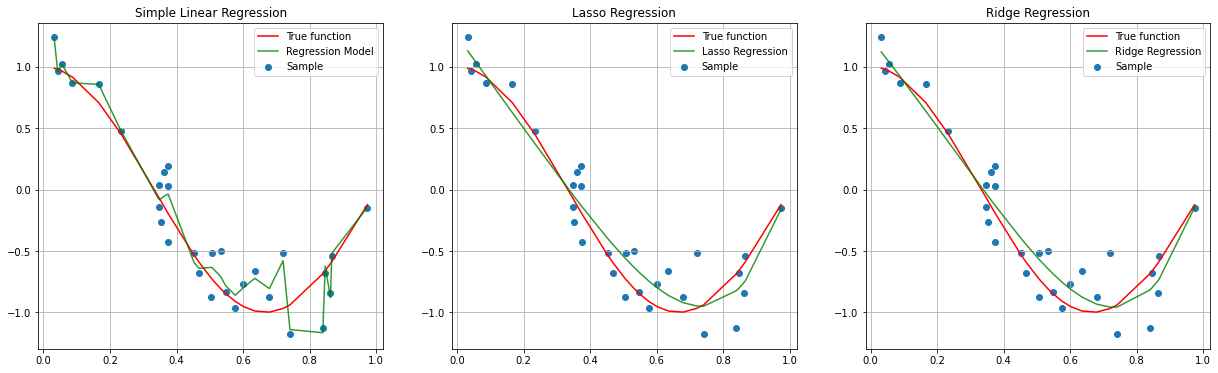

In [ ]:
plt.figure(figsize=(21, 6))

pr = LinearRegression()
pr.fit(X_pol, Y)
y_pred = pr.predict(X_pol)
plt.subplot(1, 3, 1)
plt.scatter(X, Y, label='Sample')
plt.subplot(1, 3, 1)
plt.plot(X, [f(i) for i in X ], color='r', label='True function')
plt.plot(X, y_pred, color='green', alpha= 0.8, label='Regression Model')
plt.legend()
plt.grid()
plt.title('Simple Linear Regression')


plt.subplot(1, 3, 2)
plt.scatter(X, Y, label='Sample')
plt.plot(X, [f(i) for i in X ], color='r', label='True function')
plt.plot(X, lasso_pred, color='green', alpha= 0.8, label='Lasso Regression')
plt.legend()
plt.grid()
plt.title('Lasso Regression')

plt.subplot(1, 3, 3)
plt.scatter(X, Y, label='Sample')
plt.plot(X, [f(i) for i in X ], color='r', label='True function')
plt.plot(X, ridge_pred, color='green', alpha= 0.8, label='Ridge Regression')
plt.legend()
plt.grid()
plt.title('Ridge Regression')
plt.show()